<a href="https://colab.research.google.com/github/BM304/DA/blob/main/data_analyst_course__final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Фильмы с данными из википедии
> https://www.kaggle.com/jrobischon/wikipedia-movie-plots


1.   Подготовьте гистограммы по самым популярным жанрам, режиссерам, нац. 
принадлежностям фильмов, годам.
2.   Подготовьте sentiment analysis по отзывам (используя  nltk.classify) и оцените, как распределяется sentiment по актерам, режиссерам и жанрам

# Рекомендации

* Результаты и выводы выделяйте явно. Это главное
* Код поддерживайте в чистоте, лишние, ненужные, устаревшие детали удаляйте. 
* Повторяющиеся куски кода в данном случае лучше выделять в функции

Гуглите, ищите информацию, решайте проблему: в реальной ситуации вы должны суметь помочь себе сами или найти у кого спросить

In [1]:
#@title
# Подключаемся к kaggle
! pip install kaggle
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#@title
# Забираем данные 
! kaggle datasets download jrobischon/wikipedia-movie-plots

 84% 25.0M/29.9M [00:00<00:00, 88.3MB/s]
100% 29.9M/29.9M [00:00<00:00, 96.2MB/s]


In [3]:
#@title
# Распаковываем архив 
! unzip /content/wikipedia-movie-plots.zip

Archive:  /content/wikipedia-movie-plots.zip
  inflating: wiki_movie_plots_deduped.csv  


In [4]:
#@title
# Подключаем модули для работы
import pandas as pd
import plotly.express as px


> Исходные данные

In [5]:
#@title
# Считываем файл в дата фрейм, корректируем заголовок для дальнейшей работы
full_df = pd.read_csv('/content/wiki_movie_plots_deduped.csv')
full_df.rename(columns={'Release Year': 'Year'}, inplace=True)
full_df.rename(columns={'Origin/Ethnicity': 'Origin'}, inplace=True)

full_df.insert(8, "Count_", 1)

# Смотрим первые 10 записей для понимания структуры данных 
full_df

,Year,Title,Origin,Director,Cast,Genre,Wiki Page,Plot,Count_
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",1
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",1
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",1
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,1
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,1
...,...,...,...,...,...,...,...,...,...
34881,2014,The Water Diviner,Turkish,Director: Russell Crowe,Director: Russell Crowe\r\nCast: Russell Crowe...,unknown,https://en.wikipedia.org/wiki/The_Water_Diviner,"The film begins in 1919, just after World War ...",1
34882,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the...",1
34883,2017,Olanlar Oldu,Turkish,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru",comedy,https://en.wikipedia.org/wiki/Olanlar_Oldu,"Zafer, a sailor living with his mother Döndü i...",1
34884,2017,Non-Transferable,Turkish,Brendan Bradley,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",romantic comedy,https://en.wikipedia.org/wiki/Non-Transferable...,The film centres around a young woman named Am...,1


In [6]:
#@title
# Смотрим общую информацию по данным 
full_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       34886 non-null  int64 
 1   Title      34886 non-null  object
 2   Origin     34886 non-null  object
 3   Director   34886 non-null  object
 4   Cast       33464 non-null  object
 5   Genre      34886 non-null  object
 6   Wiki Page  34886 non-null  object
 7   Plot       34886 non-null  object
 8   Count_     34886 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 2.4+ MB


По полученной информации - есть пропуски в столбце актеры, остальные столбцы заполнены полностью



> О наборе данных

Набор данных содержит описания 34 886 фильмов со всего мира. 
Описания столбцов приведены ниже:

* Release Year  - Год, в котором был выпущен фильм.
* Title - Название фильма
* Origin/Ethnicity - Происхождение фильма (например, американского, Болливудского, тамильского и т.д.)
* Director - Директор(ы)
* Cast - Главный актер и актрисы
* Genre - Жанр(ы) фильма
* Wiki Page - URL страницы Википедии, с которой было удалено описание сюжета.
* Plot - Подробное описание сюжета фильма

#Задание 1. Подготовьте гистограммы по самым популярным жанрам, режиссерам, нац. принадлежностям фильмов, годам. 


## Популярные года выпуска фильмов


In [7]:
#@title
# подсчитываем количество публикаций на дату
df_gr=full_df.groupby('Year', as_index=False).count()[['Year','Count_']]

# фиксируем диапозон лет 
Year_max=df_gr['Year'].max()
Year_min=df_gr['Year'].min()

# корректируем тип поля год для дальнейшего вывода на график
df_gr["Year"] = df_gr["Year"].astype("string")

# проверка группировки
# df_gr.iloc[:5]

In [8]:
#@title
#фиксирование числа записей дата фрейма
#len(df_gr)

In [9]:
#@title Сколько значений вывести в топ? 
number_top = 10 #@param {type:"slider", min:1, max:116, step:1}


In [10]:
#@title
# Сортируем по убыванию и оставлем "топ" значений по мнению пользователя
df_gr_top=df_gr.sort_values( 
    by = "Count_", 
    ascending = False).head (number_top)


In [11]:
#@title
# собираем заголовок графика 
title_top= 'ТОП %1.1i. Самые популярные года киноиндустрии в диапозоне от %1.2i до %1.3i года' %(number_top, Year_min, Year_max)

# рисуем график
fig = px.bar(x=df_gr_top.Year.to_list(),
             y=df_gr_top.Count_.to_list(), 
             labels={'x':'Год выхода', 'y':'Количество выпущенных фильмов'}, 
             title= title_top )
fig.show()

> В представленой выборке мы видим, что пик выпуска фильмов приходиться на 2013 год, с 2013 года количество выпускаемых фильмов снижаеться. 

## Популярные жанры в фильмах. Гистограмма популярности по годам 
*Примечание: при выборе года необходимо обновить график (Autoscale)*


In [12]:
#@title
# Формируем выборку с данными необходимыми для графика по жанрам 
df_genre=full_df.filter(['Year','Genre','Count_'],axis=1)
# для корректной группировки разделяем Genre по 1 записи (найдено 2 разделителя - , и / и -)
df_genre=df_genre.assign(Genre=df_genre['Genre'].str.split(',')).explode('Genre')
df_genre=df_genre.assign(Genre=df_genre['Genre'].str.split('/')).explode('Genre')
df_genre=df_genre.assign(Genre=df_genre['Genre'].str.split('-')).explode('Genre')

# проводим группировку
df_genre_gr = df_genre.groupby(['Year','Genre'], as_index=False).count()[['Year','Genre','Count_']]

#ищем границу 
Genre_count_max=df_genre_gr['Count_'].max()

#ищем общий список жанров  
genre_list=df_genre_gr.Genre.unique()

# подключаем модуль для работы
import matplotlib.pyplot as plt 

# проверка 
# df_genre_gr



In [69]:
#@title
# собираем заголовок графика 
title_top= 'Жанры киноиндустрии в диапозоне от %1.1i до %1.2i года' %(Year_min, Year_max)

#рисуем график
fig = px.scatter(df_genre_gr,
                 x="Genre",
                 y="Count_", 
                 animation_frame="Year", 
                 size="Count_",
                 range_y=[-10,Genre_count_max],
                 title= title_top
                 )
fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()


> Гистограмма показывает нам, что в разные годы были полпулярны различные жанры, так например в 1925 была популярна драма (19 выпущенных фильмов) и комедия (9 выпущенных фильмов), а в 1985 году уже комедия (60 фильмов), драма (58 фильмов) и акшен (34 фильма). 

> Также стоит отметить, что довольно большой процент фильмов в выборке представлен без жанра.     

## Национальная принадлежность фильмов. Гистограмма по годам на мировой карте 

*Примечание: Для графика следующие нац. принадлежности зафиксированы как Индия:*

*  Bengali
*  Tamil
*  Telugu 
*  Kannada 
*  Assamese
*  Punjabi 
*  Malayalam 
*  Marathi 

In [14]:
#@title 
# Формируем выборку с данными необходимыми для графика по жанрам 
df_Origin=full_df.filter(['Year','Origin','Count_'],axis=1)

# проводим группировку
df_Origin_gr = df_Origin.groupby(['Year','Origin'], as_index=False).count()[['Year','Origin','Count_']]

# создаем словарь для куорректного отображения графика (название региона/страны переводим в iso_alpha 3)
iso_alpha= {'Afghanistan':'AFG',
          'Åland Islands':'ALA',
          'Albania':'ALB',
          'Algeria':'DZA',
          'American Samoa':'ASM',
          'Andorra':'AND',
          'Angola':'AGO',
          'Anguilla':'AIA',
          'Antarctica':'ATA',
          'Antigua and Barbuda':'ATG',
          'Argentina':'ARG',
          'Armenia':'ARM',
          'Aruba':'ABW',

          'Australia':'AUS',
          'Australian':'AUS',

          'Austria':'AUT',
          'Azerbaijan':'AZE',
          'Bahamas':'BHS',
          'Bahrain':'BHR',

          'Bangladesh':'BGD',
          'Bangladeshi':'BGD',

          'Barbados':'BRB',
          'Belarus':'BLR',
          'Belgium':'BEL',
          'Belize':'BLZ',
          'Benin':'BEN',
          'Bermuda':'BMU',
          'Bhutan':'BTN',
          'Bolivia (Plurinational State of)':'BOL',
          'Bonaire, Sint Eustatius and Saba':'BES',
          'Bosnia and Herzegovina':'BIH',
          'Botswana':'BWA',
          'Bouvet Island':'BVT',
          'Brazil':'BRA',
          'British Indian Ocean Territory':'IOT',
          'British Virgin Islands':'VGB',
          'Brunei Darussalam':'BRN',
          'Bulgaria':'BGR',
          'Burkina Faso':'BFA',
          'Burundi':'BDI',
          'Cabo Verde':'CPV',
          'Cambodia':'KHM',
          'Cameroon':'CMR',

          'Canada':'CAN',
          'Canadian':'CAN',

          'Cayman Islands':'CYM',
          'Central African Republic':'CAF',
          'Chad':'TCD',
          'Chile':'CHL',

          'China':'CHN',
          'Chinese':'CHN',

          'China, Hong Kong Special Administrative Region':'HKG',
          'Hong Kong':'HKG',

          'China, Macao Special Administrative Region':'MAC',

          'Christmas Island':'CXR',
          'Cocos (Keeling) Islands':'CCK',
          'Colombia':'COL',
          'Comoros':'COM',
          'Congo':'COG',
          'Cook Islands':'COK',
          'Costa Rica':'CRI',
          'Côte d’Ivoire':'CIV',
          'Croatia':'HRV',
          'Cuba':'CUB',
          'Curaçao':'CUW',
          'Cyprus':'CYP',
          'Czechia':'CZE',
          'Democratic Peoples Republic of Korea':'PRK',
          'Democratic Republic of the Congo':'COD',
          'Denmark':'DNK',
          'Djibouti':'DJI',
          'Dominica':'DMA',
          'Dominican Republic':'DOM',
          'Ecuador':'ECU',
          'Egypt':'EGY',
          'Egyptian':'EGY',
          'El Salvador':'SLV',
          'Equatorial Guinea':'GNQ',
          'Eritrea':'ERI',
          'Estonia':'EST',
          'Eswatini':'SWZ',
          'Ethiopia':'ETH',
          'Falkland Islands (Malvinas)':'FLK',
          'Faroe Islands':'FRO',
          'Fiji':'FJI',
          'Finland':'FIN',
          'France':'FRA',
          'French Guiana':'GUF',
          'French Polynesia':'PYF',
          'French Southern Territories':'ATF',
          'Gabon':'GAB',
          'Gambia':'GMB',
          'Georgia':'GEO',
          'Germany':'DEU',
          'Ghana':'GHA',
          'Gibraltar':'GIB',
          'Greece':'GRC',
          'Greenland':'GRL',
          'Grenada':'GRD',
          'Guadeloupe':'GLP',
          'Guam':'GUM',
          'Guatemala':'GTM',
          'Guernsey':'GGY',
          'Guinea':'GIN',
          'Guinea-Bissau':'GNB',
          'Guyana':'GUY',
          'Haiti':'HTI',
          'Heard Island and McDonald Islands':'HMD',
          'Holy See':'VAT',
          'Honduras':'HND',
          'Hungary':'HUN',
          'Iceland':'ISL',

          'India':'IND',
          'Bollywood':'IND',
          'Tamil':'IND',
          'Bengali':'IND',     
          'Telugu':'IND',     
          'Kannada':'IND',
          'Punjabi':'IND',
          'Malayalam':'IND',
          'Marathi':'IND',
          'Assamese':'IND',
          
          'Indonesia':'IDN',          
          'Iran (Islamic Republic of)':'IRN',
          'Iraq':'IRQ',
          'Ireland':'IRL',
          'Isle of Man':'IMN',
          'Israel':'ISR',
          'Italy':'ITA',
          'Jamaica':'JAM',

          'Japan':'JPN',
          'Japanese':'JPN',

          'Jersey':'JEY',
          'Jordan':'JOR',
          'Kazakhstan':'KAZ',
          'Kenya':'KEN',
          'Kiribati':'KIR',
          'Kuwait':'KWT',
          'Kyrgyzstan':'KGZ',
          'Lao Peoples Democratic Republic':'LAO',
          'Latvia':'LVA',
          'Lebanon':'LBN',
          'Lesotho':'LSO',
          'Liberia':'LBR',
          'Libya':'LBY',
          'Liechtenstein':'LIE',
          'Lithuania':'LTU',
          'Luxembourg':'LUX',
          'Madagascar':'MDG',
          'Malawi':'MWI',

          'Malaysia':'MYS',
          'Malaysian':'MYS',
          
          'Maldives':'MDV',
          'Maldivian':'MDV',

          'Mali':'MLI',
          'Malta':'MLT',
          'Marshall Islands':'MHL',
          'Martinique':'MTQ',
          'Mauritania':'MRT',
          'Mauritius':'MUS',
          'Mayotte':'MYT',
          'Mexico':'MEX',
          'Micronesia (Federated States of)':'FSM',
          'Monaco':'MCO',
          'Mongolia':'MNG',
          'Montenegro':'MNE',
          'Montserrat':'MSR',
          'Morocco':'MAR',
          'Mozambique':'MOZ',
          'Myanmar':'MMR',
          'Namibia':'NAM',
          'Nauru':'NRU',
          'Nepal':'NPL',
          'Netherlands':'NLD',
          'New Caledonia':'NCL',
          'New Zealand':'NZL',
          'Nicaragua':'NIC',
          'Niger':'NER',
          'Nigeria':'NGA',
          'Niue':'NIU',
          'Norfolk Island':'NFK',
          'North Macedonia':'MKD',
          'Northern Mariana Islands':'MNP',
          'Norway':'NOR',
          'Oman':'OMN',
          'Pakistan':'PAK',
          'Palau':'PLW',
          'Panama':'PAN',
          'Papua New Guinea':'PNG',
          'Paraguay':'PRY',
          'Peru':'PER',

          'Philippines':'PHL',
          'Filipino':'PHL',
          
          'Pitcairn':'PCN',
          'Poland':'POL',
          'Portugal':'PRT',
          'Puerto Rico':'PRI',
          'Qatar':'QAT',

          'Republic of Korea':'KOR',
          'South_Korean':'KOR',

          'Republic of Moldova':'MDA',
          'Réunion':'REU',
          'Romania':'ROU',

          'Russian Federation':'RUS',
          'Russian':'RUS',

          'Rwanda':'RWA',
          'Saint Barthélemy':'BLM',
          'Saint Helena':'SHN',
          'Saint Kitts and Nevis':'KNA',
          'Saint Lucia':'LCA',
          'Saint Martin (French Part)':'MAF',
          'Saint Pierre and Miquelon':'SPM',
          'Saint Vincent and the Grenadines':'VCT',
          'Samoa':'WSM',
          'San Marino':'SMR',
          'Sao Tome and Principe':'STP',
          'Sark':'',
          'Saudi Arabia':'SAU',
          'Senegal':'SEN',
          'Serbia':'SRB',
          'Seychelles':'SYC',
          'Sierra Leone':'SLE',
          'Singapore':'SGP',
          'Sint Maarten (Dutch part)':'SXM',
          'Slovakia':'SVK',
          'Slovenia':'SVN',
          'Solomon Islands':'SLB',
          'Somalia':'SOM',
          'South Africa':'ZAF',
          'South Georgia and the South Sandwich Islands':'SGS',
          'South Sudan':'SSD',
          'Spain':'ESP',
          'Sri Lanka':'LKA',
          'State of Palestine':'PSE',
          'Sudan':'SDN',
          'Suriname':'SUR',
          'Svalbard and Jan Mayen Islands':'SJM',
          'Sweden':'SWE',
          'Switzerland':'CHE',
          'Syrian Arab Republic':'SYR',
          'Tajikistan':'TJK',
          'Thailand':'THA',
          'Timor-Leste':'TLS',
          'Togo':'TGO',
          'Tokelau':'TKL',
          'Tonga':'TON',
          'Trinidad and Tobago':'TTO',
          'Tunisia':'TUN',

          'Türkiye':'TUR',
          'Turkish':'TUR',
          
          'Turkmenistan':'TKM',
          'Turks and Caicos Islands':'TCA',
          'Tuvalu':'TUV',
          'Uganda':'UGA',
          'Ukraine':'UKR',
          'United Arab Emirates':'ARE',

          'United Kingdom of Great Britain and Northern Ireland':'GBR',
          'British':'GBR',

          'United Republic of Tanzania':'TZA',
          'United States Minor Outlying Islands':'UMI',

          'United States of America':'USA',
          'American':'USA',

          'United States Virgin Islands':'VIR',
          'Uruguay':'URY',
          'Uzbekistan':'UZB',
          'Vanuatu':'VUT',
          'Venezuela (Bolivarian Republic of)':'VEN',
          'Viet Nam':'VNM',
          'Wallis and Futuna Islands':'WLF',
          'Western Sahara':'ESH',
          'Yemen':'YEM',
          'Zambia':'ZMB',
          'Zimbabwe':'ZWE'}

# проводим обновление данных (добавляем столбец с информацией по стране в формате iso_alpha 3)
from math import isnan
df_Origin_gr['iso_alpha'] = df_Origin_gr['Origin'].map(iso_alpha)

# проверка
# df_Origin_gr

In [15]:
#@title 
# собираем заголовок графика 
title_top= 'Нац. принадлежность киноиндустрии в диапозоне от %1.1i до %1.2i года' %(Year_min, Year_max)

# Рисуем график
px.choropleth(df_Origin_gr,
              locations="iso_alpha",
              color="Count_",
              animation_frame="Year",
              color_continuous_scale=px.colors.sequential.Plasma,
              projection="natural earth",
              title= title_top)

## Национальная принадлежность фильмов. Общая гистограмма за  весь период 

In [16]:
#@title
# проводим группировку
df_Origin_gr_full = df_Origin.groupby(['Origin'], as_index=False).count()[['Origin','Count_']]

# собираем заголовок графика 
title_top= 'Нац. принадлежность киноиндустрии в диапозоне от %1.1i до %1.2i года' %(Year_min, Year_max)

# рисуем график
fig = px.bar(x=df_Origin_gr_full.Origin.to_list(),
             y=df_Origin_gr_full.Count_.to_list(), 
             labels={'x':'Нац принадлежность', 'y':'Количество выпущенных фильмов'} ,
             title= title_top)
fig.show()

> Подавляющее большинство фильмов было выпущено в Америке

> Выборка не содержит исчерпывающих данных по выпуску всех вильмов (на гистограмме - карте мы видим, что фильмы из многих стран просто не представлены)

## Популярные режиссеры. Рост популярности режиссеров во времени 

In [17]:
#@title
# Формируем выборку с данными необходимыми для графика по жанрам 
df_Director=full_df.filter(['Year','Director','Count_'],axis=1)

# корректируем данные
df_Director["Director"] = df_Director["Director"].str.replace("Director: ", "")
df_Director=df_Director.assign(Director=df_Director['Director'].str.split(', ')).explode('Director')

# проводим группировку
df_Director_gr = df_Director.groupby(['Year','Director'], as_index=False).count()[['Year','Director','Count_']]

#считаем максимальное число фильмов, снятых одним режисёром 
Director_count_max=df_Director_gr['Count_'].max()


In [18]:
#@title
# собираем заголовок графика 
title_top= 'Режиссеры в диапозоне от %1.1i до %1.2i года' %(Year_min, Year_max)

# рисуем график
fig = px.bar(df_Director_gr, 
             x="Director", 
             y="Count_",
             animation_frame="Year", 
             range_y=[-10,Director_count_max],
             title= title_top)
fig.show()

## Популярные режиссеры. Общая гистограмма за весь период

In [19]:
#@title
# проводим группировку
df_Director_gr_full = df_Director.groupby(['Director'], as_index=False).count()[['Director','Count_']]

# ищем максимальное кол-во фильмов у одного режиссёра
Director_count_max_full=df_Director_gr_full['Count_'].max()


In [20]:
#@title Сколько значений вывести в топ? 
number_top2 = 13 #@param {type:"slider", min:1, max:1123, step:1}


In [21]:
#@title
# Сортируем по убыванию и оставлем "топ" значений по мнению пользователя
df_Director_gr_full_top=df_Director_gr_full.sort_values( 
    by = "Count_", 
    ascending = False).head (number_top2)

# Собираем список всех режиссеров 
Director_list=df_Director_gr_full_top['Director'].to_list()

In [22]:
#@title
# собираем заголовок графика 
title_top= 'Самые популярные режиссеры киноиндустрии в диапозоне от %1.1i до %1.2i года' %(Year_min, Year_max)

# рисуем график
fig = px.bar(x=df_Director_gr_full_top.Director.to_list(),
             y=df_Director_gr_full_top.Count_.to_list(), 
             log_y=True,
             labels={'x':'Режиссер', 'y':'Количество выпущенных фильмов'}, 
             title= title_top )
fig.show()

## Популярные режиссеры. Рост популярности во времени 

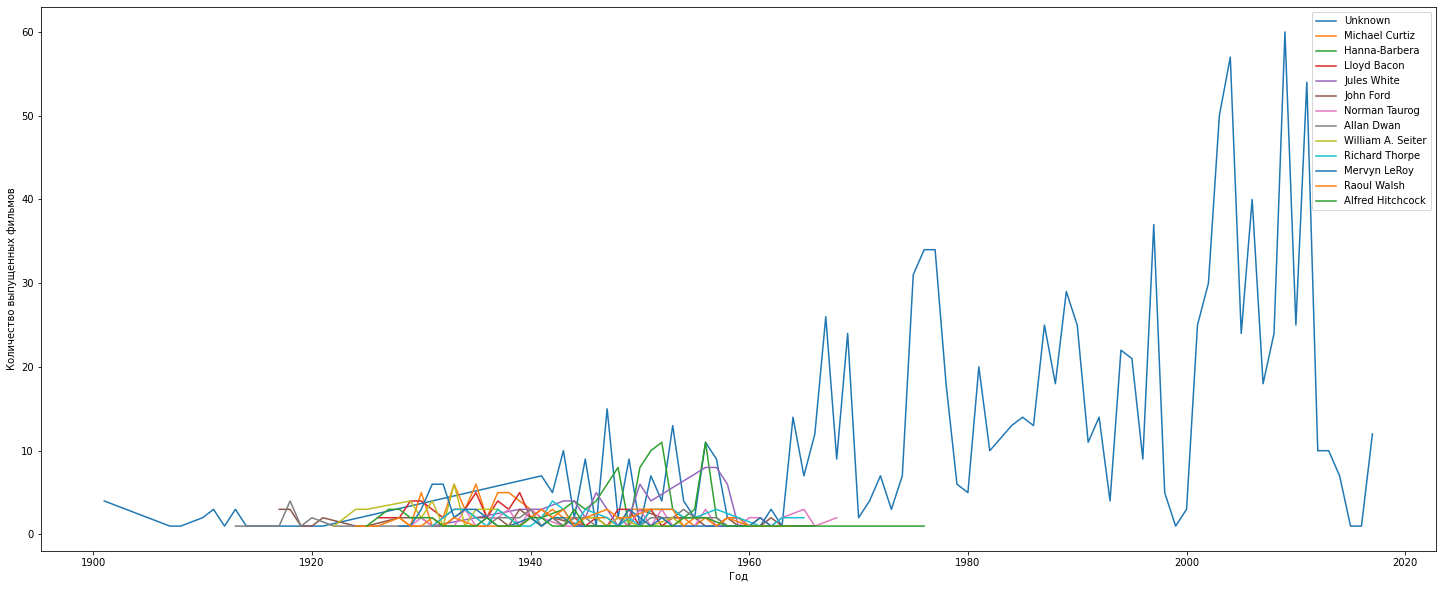

In [23]:
#@title
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1, 1, figsize=(25, 10))


for Director in Director_list:
    ax.plot(df_Director_gr[df_Director_gr.Director==Director].Year,df_Director_gr[df_Director_gr.Director==Director].Count_,label=Director)

ax.set_xlabel("Год")
ax.set_ylabel('Количество выпущенных фильмов')
ax.legend(loc='best')

> На общей гистограмме представлены режисёры, которые в ходят в топ значений за весь период своей деятельности, на гистограмме по годам можно увидеть процесс возрастания и убывания популярности того или иного режисёра

> По прежнему сохраняеться проблема отсутвия данных по некоторым фильмам в выборке

#  Задание 2. Подготовьте sentiment analysis по отзывам (используя  nltk.classify) и оцените, как распределяется sentiment по актерам, режиссерам и жанрам

In [24]:
#@title Установка nltk (выполнить 1 раз)
pip install nltk

SyntaxError: ignored

In [32]:
#@title
#испортируем модуль, скачиваем библиотеку для анализа настроения текста
import nltk 
nltk.download('vader_lexicon') 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer() 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [26]:
#@title
#Функция для удаления специальных символов и цифр из текста

import re
def remove(x):
    pattern = "['\n',@\'?\.$%_0-9]"
    x = [re.sub(pattern, '', i) for i in x]
    return x
    
# Обрабатываем столбец с описанием в дата фрейме
full_df['Plot'] = remove(full_df['Plot'])

In [ ]:
#@title
# Создаем ив дата фрейме столбцы с соотв. значениями вероятностей настроения
# compound: Нормализованный составной балл, который вычисляет сумму всех оценок лексики и принимает значения от -1 до 1
# neg: Вероятность того, что настроение будет отрицательным
# neu: Вероятность того, что настроение будет нейтральным
# pos: Вероятность того, что настроение будет положительным

full_df['compound'] = [vader.polarity_scores(x)['compound'] for x in full_df['Plot']]
full_df['neg'] = [vader.polarity_scores(x)['neg'] for x in full_df['Plot']]
full_df['neu'] = [vader.polarity_scores(x)['neu'] for x in full_df['Plot']]
full_df['pos'] = [vader.polarity_scores(x)['pos'] for x in full_df['Plot']]

In [ ]:
#@title
# Добавляем столбец sentiment для фиксирования итогов анализа настроения 
full_df['sentiment']=full_df['compound'].apply (lambda c: 'pos' if c>=0 else 'neg' )

##  Итоги проведения sentiment analysis по отзывам 

In [33]:
#@title
full_df

,Year,Title,Origin,Director,Cast,Genre,Wiki Page,Plot,Count_,compound,neg,neu,pos,sentiment
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,A bartender is working at a saloon serving dri...,1,-0.7269,0.073,0.927,0.000,neg
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,The moon painted with a smiling face hangs ove...,1,0.8934,0.024,0.821,0.155,pos
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,The film just over a minute long is composed o...,1,-0.4215,0.079,0.878,0.043,neg
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just seconds and consisting of two sh...,1,0.5647,0.033,0.904,0.063,pos
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,1,-0.2144,0.081,0.836,0.082,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34881,2014,The Water Diviner,Turkish,Director: Russell Crowe,Director: Russell Crowe\r\nCast: Russell Crowe...,unknown,https://en.wikipedia.org/wiki/The_Water_Diviner,The film begins in just after World War I has...,1,-0.9969,0.162,0.773,0.066,neg
34882,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,Two musicians Salih and Gürkan described the a...,1,0.3400,0.000,0.806,0.194,pos
34883,2017,Olanlar Oldu,Turkish,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru",comedy,https://en.wikipedia.org/wiki/Olanlar_Oldu,Zafer a sailor living with his mother Döndü in...,1,0.8860,0.000,0.838,0.162,pos
34884,2017,Non-Transferable,Turkish,Brendan Bradley,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",romantic comedy,https://en.wikipedia.org/wiki/Non-Transferable...,The film centres around a young woman named Am...,1,0.3578,0.037,0.918,0.045,pos


## Общий анализ настроения по выборке фильмов

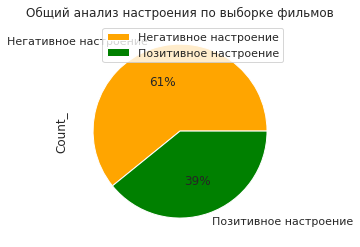

In [34]:
#@title
# Рисуем гистограмму общего анализа настроения в представленой выборке
full_df.groupby(['sentiment']).sum().plot(kind='pie', 
                                          y='Count_',
                                          labels = ['Негативное настроение','Позитивное настроение'],
                                          autopct='%1.0f%%', 
                                          colors=['orange', 'green'],                                                                                  
                                          title= 'Общий анализ настроения по выборке фильмов')


>  61% представленой выборки представлен в большей степени с негативным описанием своего содержания, напротив же 39% описано в позитивном свете.  

## Изменение настроения во времени

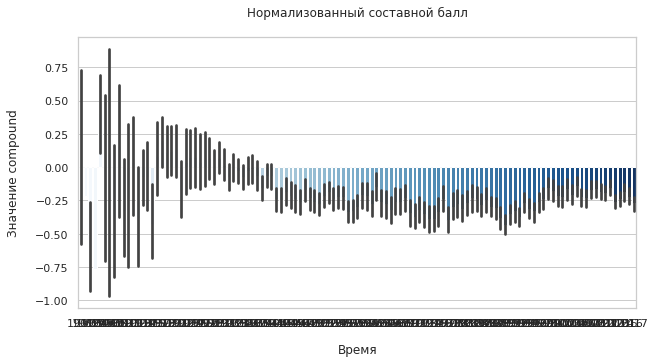

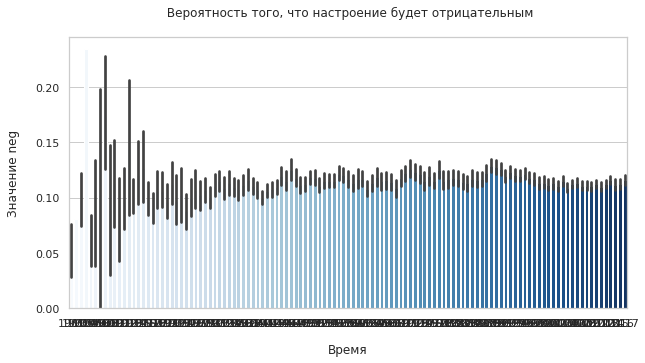

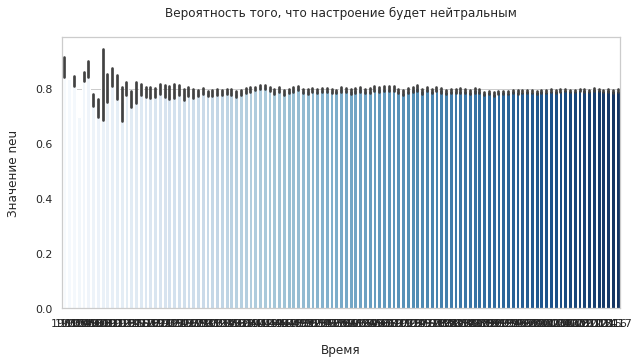

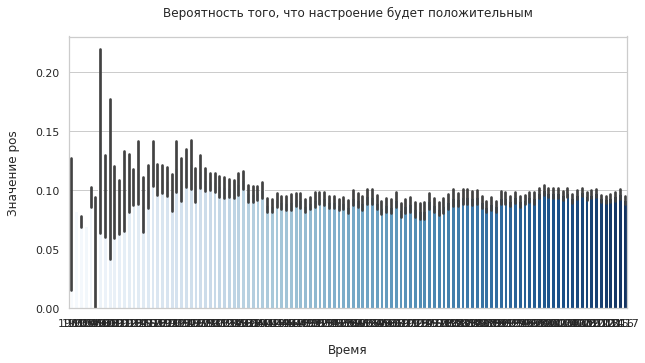

In [35]:
#@title
import seaborn as sns

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize = (10, 5))

sns.barplot(data = full_df,
            x = full_df['Year'],
            y = full_df['compound'],
            palette = 'Blues')

plt.title('Нормализованный составной балл', pad=20)
plt.xlabel('Время', labelpad = 15)
plt.ylabel('Значение compound', labelpad = 15)
plt.show();


sns.set(style="whitegrid")
f, ax = plt.subplots(figsize = (10, 5))

sns.barplot(data = full_df,
            x = full_df['Year'],
            y = full_df['neg'],
            palette = 'Blues')

plt.title(' Вероятность того, что настроение будет отрицательным', pad=20)
plt.xlabel('Время', labelpad = 15)
plt.ylabel('Значение neg', labelpad = 15)
plt.show();


sns.set(style="whitegrid")
f, ax = plt.subplots(figsize = (10, 5))

sns.barplot(data = full_df,
            x = full_df['Year'],
            y = full_df['neu'],
            palette = 'Blues')

plt.title('Вероятность того, что настроение будет нейтральным', pad=20)
plt.xlabel('Время', labelpad = 15)
plt.ylabel('Значение neu', labelpad = 15)
plt.show();

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize = (10, 5))

sns.barplot(data = full_df,
            x = full_df['Year'],
            y = full_df['pos'],
            palette = 'Blues')

plt.title('Вероятность того, что настроение будет положительным', pad=20)
plt.xlabel('Время', labelpad = 15)
plt.ylabel('Значение pos', labelpad = 15)
plt.show();


> Графики показывают, что описание преимущественно выполненко из нейтрально окрашеных слов, описания с негативным и позитивным окрасом сбалансированы 

## Распределение sentiment по актерам, режиссерам и жанрам

In [38]:
#@title
#выбираем данные для работы
full_df_sentiment_actor=full_df.filter(['Cast','sentiment','Count_'],axis=1)
full_df_sentiment_director=full_df.filter(['Director','sentiment','Count_'],axis=1)
full_df_sentiment_genre=full_df.filter(['Genre','sentiment','Count_'],axis=1)

#Убираем лишние заголовки
full_df_sentiment_director["Director"] = full_df_sentiment_director["Director"].str.replace("Director: ", "")
full_df_sentiment_director["Director"] = full_df_sentiment_director["Director"].str.replace(r'\([^)]*\)', "")
full_df_sentiment_director["Director"] = full_df_sentiment_director["Director"].str.replace(r'[0-9]..irectors', "")
full_df_sentiment_director["Director"] = full_df_sentiment_director["Director"].str.replace('"', '')
full_df_sentiment_director["Director"] = full_df_sentiment_director["Director"].str.replace("'", "")
full_df_sentiment_actor["Cast"] = full_df_sentiment_actor["Cast"].str.replace(r'\([^)]*\)', "")
full_df_sentiment_actor["Cast"] = full_df_sentiment_actor["Cast"].str.replace("Director%Cast:", "")
full_df_sentiment_actor["Cast"] = full_df_sentiment_actor["Cast"].str.replace("Cast:", "")
full_df_sentiment_genre["Genre"] = full_df_sentiment_genre["Genre"].str.replace(r'\([^)]*\)', "")

# Проводим разбивку строк с несколькими значениями
full_df_sentiment_actor=full_df_sentiment_actor.assign(Cast=full_df_sentiment_actor['Cast'].str.split(',')).explode('Cast')
full_df_sentiment_actor=full_df_sentiment_actor.assign(Cast=full_df_sentiment_actor['Cast'].str.split('/')).explode('Cast')
full_df_sentiment_actor=full_df_sentiment_actor.assign(Cast=full_df_sentiment_actor['Cast'].str.split('&')).explode('Cast')
full_df_sentiment_actor=full_df_sentiment_actor.assign(Cast=full_df_sentiment_actor['Cast'].str.split(';')).explode('Cast')
full_df_sentiment_director=full_df_sentiment_director.assign(Director=full_df_sentiment_director['Director'].str.split(',')).explode('Director')
full_df_sentiment_director=full_df_sentiment_director.assign(Director=full_df_sentiment_director['Director'].str.split('&')).explode('Director')
full_df_sentiment_director=full_df_sentiment_director.assign(Director=full_df_sentiment_director['Director'].str.split('/')).explode('Director')
full_df_sentiment_genre=full_df_sentiment_genre.assign(Genre=full_df_sentiment_genre['Genre'].str.split(',')).explode('Genre')
full_df_sentiment_genre=full_df_sentiment_genre.assign(Genre=full_df_sentiment_genre['Genre'].str.split('/')).explode('Genre')
full_df_sentiment_genre=full_df_sentiment_genre.assign(Genre=full_df_sentiment_genre['Genre'].str.split('&')).explode('Genre')

# проводим группировку
full_df_sentiment_actor_gr = full_df_sentiment_actor.groupby(['Cast','sentiment'], as_index=False).count()[['Cast','sentiment','Count_']]
full_df_sentiment_director_gr  = full_df_sentiment_director.groupby(['Director','sentiment'], as_index=False).count()[['Director','sentiment','Count_']]
full_df_sentiment_genre_gr  = full_df_sentiment_genre.groupby(['Genre','sentiment'], as_index=False).count()[['Genre','sentiment','Count_']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning:

The default value of regex will change from True to False in a future version.



### Актеры

In [70]:
#@title
#фиксирование числа записей дата фрейма
#len(full_df_sentiment_actor_gr)

In [42]:
#@title Сколько значений вывести в топ актеров с позитивной и негативной оценкой? 
number_top_actor = 4 #@param {type:"slider", min:1, max:50, step:1}




In [43]:
#@title
# Разбивка на группы 
full_df_sentiment_actor_pos=full_df_sentiment_actor_gr[full_df_sentiment_actor_gr['sentiment'].isin(['pos'])]
full_df_sentiment_actor_neg=full_df_sentiment_actor_gr[full_df_sentiment_actor_gr['sentiment'].isin(['neg'])]

# Сортируем по убыванию и оставлем "топ" значений по мнению пользователя
full_df_sentiment_actor_pos_top=full_df_sentiment_actor_pos.sort_values( 
    by = "Count_", 
    ascending = False).head (number_top_actor)

full_df_sentiment_actor_neg_top=full_df_sentiment_actor_neg.sort_values( 
    by = "Count_", 
    ascending = False).head (number_top_actor)

In [56]:
#@title
#Вывод данных 
title_actor_pos ='ТОП %1.1i актеров, фильмы с которыми  вам понравятся' %(number_top_actor)
print (title_actor_pos)
print (' ')
full_df_sentiment_actor_pos_top['Cast']

ТОП 4 актеров, фильмы с которыми  вам понравятся
 


14194                   Jr.
44827        Sivaji Ganesan
23260                  Pran
40873    M. G. Ramachandran
Name: Cast, dtype: object

In [53]:
#@title
#Вывод данных 
title_actor_neg='ТОП %1.1i актеров, фильмы с которыми вам не понравятся' %(number_top_actor)
print (title_actor_neg)
print (' ')

full_df_sentiment_actor_neg_top ['Cast']

ТОП 4 актеров, фильмы с которыми вам не понравятся
 


14193           Jr.
38833     Jeetendra
39345    John Wayne
41891      Mohanlal
Name: Cast, dtype: object

> Большая выборка показывает, что многие актеры вызывают не одназначное мнение. 

### Режиссеры

In [71]:
#@title
#фиксирование числа записей дата фрейма
#len(full_df_sentiment_director_gr)

In [58]:
#@title Сколько значений вывести в топ режиссеров с позитивной и негативной оценкой? 
number_top_director = 18 #@param {type:"slider", min:1, max:50, step:1}



In [59]:
#@title
# Сортируем по убыванию и оставлем "топ" значений по мнению пользователя
full_df_sentiment_director_top=full_df_sentiment_director_gr.sort_values( 
    by = "Count_", 
    ascending = False).head (number_top_director)

#@title
# Разбивка на группы 
full_df_sentiment_director_gr_pos=full_df_sentiment_director_gr[full_df_sentiment_director_gr['sentiment'].isin(['pos'])]
full_df_sentiment_director_gr_neg=full_df_sentiment_director_gr[full_df_sentiment_director_gr['sentiment'].isin(['neg'])]

# Сортируем по убыванию и оставлем "топ" значений по мнению пользователя
full_df_sentiment_director_gr_pos_top=full_df_sentiment_director_gr_pos.sort_values( 
    by = "Count_", 
    ascending = False).head (number_top_director)

full_df_sentiment_director_gr_neg_top=full_df_sentiment_director_gr_neg.sort_values( 
    by = "Count_", 
    ascending = False).head (number_top_director)

In [60]:
#@title
#Вывод данных 
title_director_pos ='ТОП %1.1i режиссеров, фильмы которых вам понравятся' %(number_top_director)
print (title_director_pos)
print (' ')
full_df_sentiment_director_gr_pos_top['Director']

ТОП 18 режиссеров, фильмы которых вам понравятся
 


14840               Unknown
15373     William A. Seiter
8944            Lloyd Bacon
12437     Robert Z. Leonard
10552         Norman Taurog
9738         Michael Curtiz
5328           George Cukor
1621        Alfred E. Green
5767          Hanna-Barbera
1657             Allan Dwan
5969           Henry Koster
12165        Richard Thorpe
7820     K. Raghavendra Rao
4972            Frank Capra
9695           Mervyn LeRoy
3932           David Butler
7755         K. Balachander
15524           Woody Allen
Name: Director, dtype: object

In [62]:
#@title
#Вывод данных 
title_director_neg='ТОП %1.1i режиссеров, фильмы которых вам не понравятся' %(number_top_director)
print (title_director_neg)
print (' ')

full_df_sentiment_director_gr_neg_top ['Director']

ТОП 18 режиссеров, фильмы которых вам не понравятся
 


14839              Unknown
5766         Hanna-Barbera
9737        Michael Curtiz
7208             John Ford
1623      Alfred Hitchcock
7654           Jules White
5538        Gordon Douglas
11884          Raoul Walsh
4629        Edward Dmytryk
12478         Roger Corman
15378     William Beaudine
12100    Richard Fleischer
8943           Lloyd Bacon
8808       Lesley Selander
9694          Mervyn LeRoy
1656            Allan Dwan
9822        Michael Powell
12164       Richard Thorpe
Name: Director, dtype: object

> Аналогично актерам выборка показывает, что не может быть однозначного отношения к деятельности того или иного режиссера.

> Дополнительно видим, что часть фильмов в выборке оказалась без информации по режиссерам.

### Жанры

In [64]:
#@title
#фиксирование числа записей дата фрейма
#len(full_df_sentiment_genre_gr)

In [65]:
#@title Сколько значений вывести в топ жанров с позитивной и негативной оценкой? 
number_top_genre = 18 #@param {type:"slider", min:1, max:50, step:1}

In [66]:
#@title
# Сортируем по убыванию и оставлем "топ" значений по мнению пользователя
full_df_sentiment_genre_top=full_df_sentiment_genre_gr.sort_values( 
    by = "Count_", 
    ascending = False).head (number_top_genre)

#@title
# Разбивка на группы 
full_df_sentiment_genre_gr_pos=full_df_sentiment_genre_gr[full_df_sentiment_genre_gr['sentiment'].isin(['pos'])]
full_df_sentiment_genre_gr_neg=full_df_sentiment_genre_gr[full_df_sentiment_genre_gr['sentiment'].isin(['neg'])]

# Сортируем по убыванию и оставлем "топ" значений по мнению пользователя
full_df_sentiment_genre_gr_pos_top=full_df_sentiment_genre_gr_pos.sort_values( 
    by = "Count_", 
    ascending = False).head (number_top_genre)
    
full_df_sentiment_genre_gr_neg_top=full_df_sentiment_genre_gr_neg.sort_values( 
    by = "Count_", 
    ascending = False).head (number_top_genre)

In [67]:
#@title
#Вывод данных 
title_genre_pos ='ТОП %1.1i жанров, на которые стоит обратить внимаение при выборе фильма' %(number_top_genre)
print (title_genre_pos)
print (' ')
full_df_sentiment_genre_gr_pos_top['Genre']

ТОП 18 жанров, на которые стоит обратить внимаение при выборе фильма
 


615              comedy
752               drama
1486            unknown
1181            romance
102               drama
1034            musical
1219    romantic comedy
382              action
260             romance
1516            western
438           adventure
71               comedy
833              family
1459           thriller
485           animation
211             musical
687               crime
1042     musical comedy
Name: Genre, dtype: object

In [68]:
#@title
#Вывод данных 
title_genre_neg='ТОП %1.1i жанров, на которые стоит обратить внимаение при выборе фильма' %(number_top_genre)
print (title_genre_neg)
print (' ')

full_df_sentiment_genre_gr_neg_top ['Genre']

ТОП 18 жанров, на которые стоит обратить внимаение при выборе фильма
 


751               drama
1485            unknown
614              comedy
381              action
939              horror
1458           thriller
1515            western
686               crime
101               drama
694         crime drama
437           adventure
1180            romance
1275    science fiction
883           film noir
1052            mystery
1492                war
346            thriller
70               comedy
Name: Genre, dtype: object

> Сохранятся тендеция различного отношения к одним и темже переменным. 